In [183]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [205]:
#вводим два массива любых чисел
X = np.array([2,1,-3,1,-4]).reshape((-1, 1))
Y = np.array([1,-2,3,4,5])

In [208]:
# этот массив надо сразу вводить в таком виде, но мне лень
X

array([[ 2],
       [ 1],
       [-3],
       [ 1],
       [-4]])

In [209]:
#находим среднее арифметическое у каждого массива
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [201]:
#находим длину массива X
size = len(X)

In [213]:
# Y = b0 + b1*X - формула линейной регрессии
# b1 = sum(X - mean_x)(Y - mean_y)/sum(X - mean_x)^2 - наклон или смещение линии регрессии
# b0 - точка пересечения линии регрессии с осью

numer = 0 #просто переменные для комфорта
denom = 0
for i in range(size):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (size * mean_x)

print (f'b1 = {b1} \nb0 = {b0}')

b1 = [-0.63013699] 
b0 = 5.2


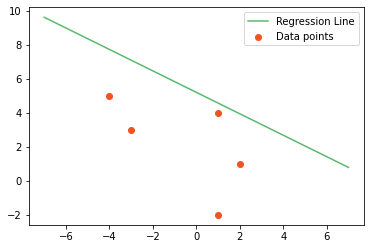

In [214]:
# График для наглядности (его в машинный код не нужно, это для меня)
max_x = np.max(X) + size
min_x = np.min(Y) - size

x = np.linspace(min_x, max_x, size)
y = b0 + b1 * x

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='Data points')

plt.legend()
plt.show()

In [212]:
# R^2 = sum(Ypred - mean_y)^2/sum(Y - mean_y) - коэффициент детерминции
# короче оцениваем херовость нашей регрессии и уходим в депрессию

ss_t = 0 #просто переменные для комфорта
ss_r = 0 

for i in range(size):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (y_pred - Y[i]) ** 2
    
R2 = ss_r/ss_t

print(R2)

[2.47606091]
